In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import re
import DataAnalysis as da

The number of mention tweets is 5846
The number of retweets is 30144
The number of reply tweets is 1524
The number of general tweets is 8314
The number of total number of tweets is 45828
The number of different users is 32973
The average number of general tweets per user is: 0.25214569496254513
The average number of mentions tweets per user is: 0.17729657598641313
The average number of retweets per user is: 0.914202529342189
The average number of replies per user is: 0.04621963424620144
5 most popular hashtags with their respective occurances are [('Philae', 18218), ('ESA', 10244), ('esa', 3042), ('philae', 1580), ('esaoperations', 984)]
5 contextually different most popular hashtags with their respective occurances are [('philae', 19798), ('esa', 13293), ('esaoperations', 987), ('livestream', 900), ('observingspace', 452)]
5 most popular apps to send tweets are [('Twitter Web Client', 17191), ('Twitter for iPhone', 7592), ('Twitter for Android', 6882), ('TweetDeck', 2732), ('Twitter f

In [2]:
pd.set_option('max_colwidth', 400)
df = pd.read_csv('./data/CleanedCometLanding.csv')

In [3]:
''' This function returns the number of different users in the dataset'''
def getDifferentUsers(df):
    differentUsers = df['from_user'].unique()
    return (list(differentUsers))

In [4]:
''' This function returns the lists for the edges in the network '''
'''  This function iterates the dataset and adds connections to the correct list'''
def getEdgesOfRetweets(df):

    userNameColumn = df['from_user']
    retweetEdges = []
    mentionsEdges = []
    repliesEdges = []
    
    #Itertuples has better execution performance than items() and iterrows()
    for namedTuple in df.itertuples():
        
        
        userName = namedTuple[2] #This is the username of the person sending the tweet
        tweet = namedTuple[3] #This is the tweet itself sent by the username above
        userBeingReplied = namedTuple[9] #This is given by the dataset if the tweet is a reply
        
        #If the tweet is a reply, in_reply_to_screen_name object will not be null
        if pd.isnull(namedTuple[9]) == False:
            repliesEdges.append((userName, userBeingReplied))
            
        #If the tweet is a retweet
        if re.search('RT @' , str(tweet))!= None:
            
            for word in tweet.split():
                extractionPattern = '(?<=@).*(?=:)'
                retweet = re.search(extractionPattern,word)
                if retweet != None:
                    retweetEdges.append((userName,retweet.group(0)))
            
        #If the tweet is a mention
        elif re.search ('@' , str(tweet))!= None:
    
            for word in tweet.split():
                extractionPattern = r'(?<=@).*(?=\b)'
                mention = re.search(extractionPattern,word)
                if mention != None:
                    mentionsEdges.append((userName,mention.group(0)))     
        
    return retweetEdges, mentionsEdges, repliesEdges

In [5]:
''' This function returns the graph built from the nodes and edges returned from the functions above. '''
def drawNetwork(df):
    
    df = df.head(1000)
    
    nodes = []
    nodes = getDifferentUsers(df)
    
    #nodes = map(lambda x: (x,{'size':100}),nodes)
    
    retweetEdges, mentionsEdges, repliesEdges = getEdgesOfRetweets(df)
    
    #retweetEdges = map(lambda x: (x,{'thickness':10}),retweetEdges)
    #mentionsEdges = map(lambda x: (x,{'thickness':20}),mentionsEdges)
    #repliesEdges = map(lambda x: (x,{'thickness':5}),repliesEdges)
    
    g = nx.Graph()
    g.add_nodes_from(nodes)
    g.add_edges_from(retweetEdges)
    g.add_edges_from(mentionsEdges)
    g.add_edges_from(mentionsEdges)
    
    nx.draw(g,node_size = 10,width=1,with_labels=False)
    plt.show()

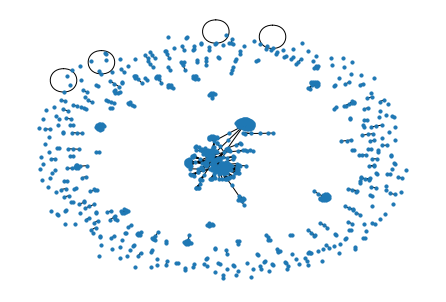

In [6]:
drawNetwork(df)